<b> PHYS 4060 Lab 1 <b>
    <br>
    <plaintext> First Level Analysis of a Time Series <plaintext>

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

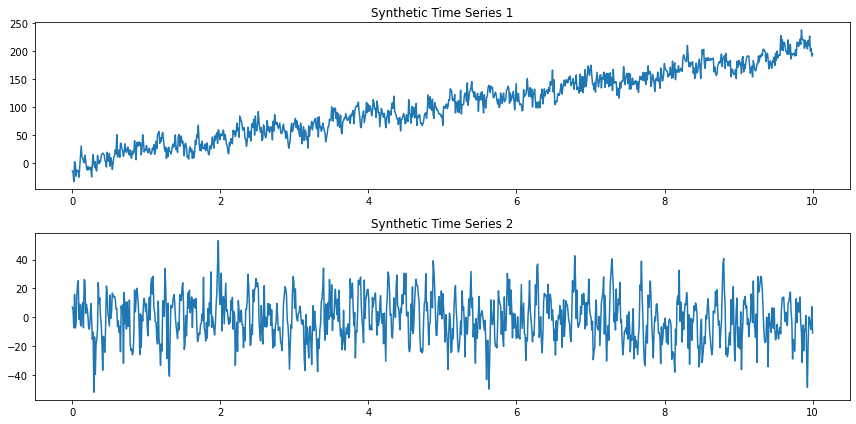

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Define parameters
n_points = 1000  # Number of data points
t = np.linspace(0, 10, n_points)  # Time vector

# Generate the first synthetic time series
series1 = np.zeros(n_points)
num_sin = 5  # Number of sinusoids

for _ in range(num_sin):
    freq = np.random.uniform(0.1, 10)  # Frequency in Hz
    amplitude = np.random.uniform(1, 10)  # Amplitude
    phase = np.random.uniform(0, 2 * np.pi)  # Phase
    series1 += amplitude * np.sin(2 * np.pi * freq * t + phase)

# Add linear trend
slope = 20
intercept = 2
linear_trend = slope * t + intercept
series1 += linear_trend

# Add random noise
noise_level = 10
noise = np.random.normal(0, noise_level, n_points)
series1 += noise

# Generate the second synthetic time series with similar characteristics
series2 = np.zeros(n_points)

for _ in range(num_sin):
    freq = np.random.uniform(0.1, 10)  # Frequency in Hz
    amplitude = np.random.uniform(1, 10)  # Amplitude
    phase = np.random.uniform(0, 2 * np.pi)  # Phase
    series2 += amplitude * np.sin(2 * np.pi * freq * t + phase)

# Add quadratic trend
quadratic_trend = 0.1 * t**2 - 0.5 * t + 0.3
series2 += -quadratic_trend

# Add random noise
noise2 = np.random.normal(0, noise_level, n_points)
series2 += noise2

# Plot the synthetic time series
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.title('Synthetic Time Series 1')
plt.plot(t, series1)
plt.subplot(2, 1, 2)
plt.title('Synthetic Time Series 2')
plt.plot(t, series2)
plt.tight_layout()
plt.show()


In [3]:
# Defining the mean for each series
mean_series_1 = np.mean(series1)
mean_series_2 = np.mean(series2)

print('The mean for series1 is: ', mean_series_1)
print('')
print('The mean for series2 is: ', mean_series_2)
print('')


# Defining the variance for each series
diff_mean1_series1 = []
for i in series1: 
    diff_mean1_series1.append((i-mean_series_1)**2)

variance_series_1 = 1/n_points * (np.sum(diff_mean1_series1))
print('The variance for series 1 is: ', variance_series_1)
print('')

diff_mean2_series2 = []
for i in series2:
    diff_mean2_series2.append((i - mean_series_2)**2)

variance_series_2 = 1/n_points * (np.sum(diff_mean2_series2))
print('The variance for series 2 is: ', variance_series_2)
print('')


The mean for series1 is:  102.18146411146962

The mean for series2 is:  -0.6082501588014317

The variance for series 1 is:  3552.660485873962

The variance for series 2 is:  241.71908133191442



In [4]:
# Defining the quadratic norm and power for each series\
def quadratic_norm(series):
    return np.sqrt(np.sum(series**2))

def power(series):
    return np.mean(series**2)

quad_norm_series_1 = quadratic_norm(series1)
print('The quadratic norm for series 1 is: {}'.format(quad_norm_series_1))
print('')
quad_norm_series_2 = quadratic_norm(series2)
print('The quadratic norm for series 2 is: {}'.format(quad_norm_series_2))
print('')
power_series_1 = power(series1)
print('The power for series 1 is: {}'.format(power_series_1))
print('')
power_series_2 = power(series2)
print('The power for series 2 is: {}'.format(power_series_2))

The quadratic norm for series 1 is: 3740.8170356003134

The quadratic norm for series 2 is: 492.02545623940676

The power for series 1 is: 13993.712093837516

The power for series 2 is: 242.08904958759638


In [5]:
# Calculate Auto-Covariance Function
def autocovariance(series, lag):
    n = len(series)
    autocovar_sum = 0
    mean_series = np.mean(series)
    for t in range(n - lag):
        autocovar_sum += (series[t] - mean_series) * (series[t + lag] - mean_series)

    return autocovar_sum / n
# Calculate Auto-Correlation Function
def auto_correlation(series, lag):
    cov_k = autocovariance(series, lag)
    cov_0 = autocovariance(series, 0)
    return cov_k / cov_0

# Calculate Auto-Covariance and Auto-Correlation for Series 1 and Series 2
lag = 1

auto_cov_series1 = autocovariance(series1, lag)
auto_corr_series1 = auto_correlation(series1, lag)

auto_cov_series2 = autocovariance(series2, lag)
auto_corr_series2 = auto_correlation(series2, lag)

# Print Auto-Covariance and Auto-Correlation for Series 1 and Series 2
print("Auto-Covariance for Series 1 (Lag = 1):")
print(auto_cov_series1)

print("\nAuto-Correlation for Series 1 (Lag = 1):")
print(auto_corr_series1)

print("\nAuto-Covariance for Series 2 (Lag = 1):")
print(auto_cov_series2)

print("\nAuto-Correlation for Series 2 (Lag = 1):")
print(auto_corr_series2)


Auto-Covariance for Series 1 (Lag = 1):
3440.077754538502

Auto-Correlation for Series 1 (Lag = 1):
0.968310303846058

Auto-Covariance for Series 2 (Lag = 1):
124.84815128252916

Auto-Correlation for Series 2 (Lag = 1):
0.5165010167777984


In [6]:
# Calculate Cross-Covariance Function
def cross_covariance(series1, series2, lag):
    n = len(series1)
    cross_covar_sum = 0
    mean1 = np.mean(series1)
    mean2 = np.mean(series2)
    for t in range(n - lag):
        cross_covar_sum += (series1[t] - mean1) * (series2[t + lag] - mean2)
    return cross_covar_sum / n

# Calculate Cross-Correlation Function
def cross_correlation(series1, series2, lag):
    cov_k = cross_covariance(series1, series2, lag)
    std1 = np.std(series1)
    std2 = np.std(series2)
    return cov_k / (std1 * std2)

# Calculate Cross-Covariance and Cross-Correlation for Series 1 and Series 2
cross_covariance_values = cross_covariance(series1, series2, lag)
cross_correlation_values = cross_correlation(series1, series2, lag)

# Print Cross-Covariance and Cross-Correlation
print("Cross-Covariance between Series 1 and Series 2 (Lag = 1):")
print(cross_covariance_values)

print("\nCross-Correlation between Series 1 and Series 2 (Lag = 1):")
print(cross_correlation_values)


Cross-Covariance between Series 1 and Series 2 (Lag = 1):
-79.15041998282616

Cross-Correlation between Series 1 and Series 2 (Lag = 1):
-0.08541239568311673


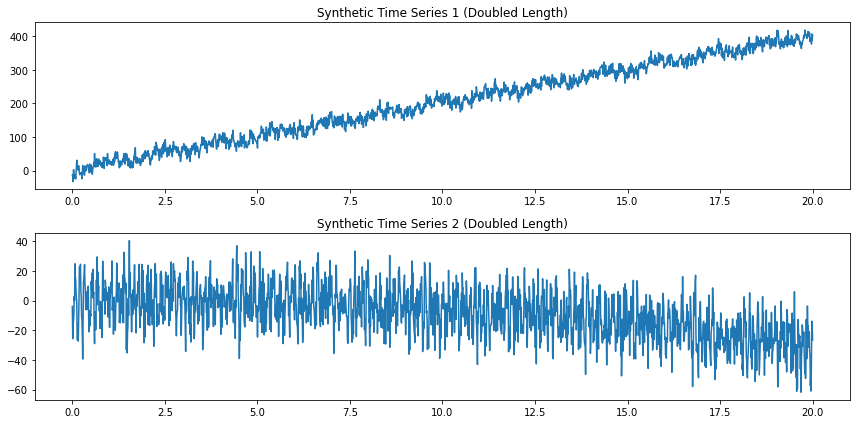

In [7]:
# Set seed for reproducibility
np.random.seed(42)

# Define parameters for the doubled length
n_points_doubled = 2000  # Double the number of data points
t_doubled = np.linspace(0, 20, n_points_doubled)  # Double the time vector

# Generate the first synthetic time series with doubled length
series1_doubled = np.zeros(n_points_doubled)
num_sin = 5  # Number of sinusoids

for _ in range(num_sin):
    freq = np.random.uniform(0.1, 10)  # Frequency in Hz
    amplitude = np.random.uniform(1, 10)  # Amplitude
    phase = np.random.uniform(0, 2 * np.pi)  # Phase
    series1_doubled += amplitude * np.sin(2 * np.pi * freq * t_doubled + phase)

# Add linear trend
slope = 20
intercept = 2
linear_trend_doubled = slope * t_doubled + intercept
series1_doubled += linear_trend_doubled

# Add random noise
noise_level = 10
noise_doubled = np.random.normal(0, noise_level, n_points_doubled)
series1_doubled += noise_doubled

# Generate the second synthetic time series with doubled length
series2_doubled = np.zeros(n_points_doubled)

for _ in range(num_sin):
    freq = np.random.uniform(0.1, 10)  # Frequency in Hz
    amplitude = np.random.uniform(1, 10)  # Amplitude
    phase = np.random.uniform(0, 2 * np.pi)  # Phase
    series2_doubled += amplitude * np.sin(2 * np.pi * freq * t_doubled + phase)

# Add quadratic trend
quadratic_trend_doubled = 0.1 * t_doubled**2 - 0.5 * t_doubled + 0.3
series2_doubled += -quadratic_trend_doubled

# Add random noise
noise2_doubled = np.random.normal(0, noise_level, n_points_doubled)
series2_doubled += noise2_doubled

# Plot the synthetic time series with doubled length
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.title('Synthetic Time Series 1 (Doubled Length)')
plt.plot(t_doubled, series1_doubled)
plt.subplot(2, 1, 2)
plt.title('Synthetic Time Series 2 (Doubled Length)')
plt.plot(t_doubled, series2_doubled)
plt.tight_layout()
plt.show()


In [8]:
# Defining the mean for each series
mean_series_1_doubled = np.mean(series1_doubled)
mean_series_2_doubled = np.mean(series2_doubled)

print('The mean for series1 is: ', mean_series_1_doubled)
print('')
print('The mean for series2 is: ', mean_series_2_doubled)
print('')


# Defining the variance for each series
diff_mean1_series1_doubled = []
for i in series1_doubled: 
    diff_mean1_series1_doubled.append((i-mean_series_1_doubled)**2)

variance_series_1_doubled = 1/n_points_doubled * (np.sum(diff_mean1_series1_doubled))
print('The variance for series 1 is: ', variance_series_1_doubled)
print('')

diff_mean2_series2_doubled = []
for i in series2_doubled:
    diff_mean2_series2_doubled.append((i - mean_series_2_doubled)**2)

variance_series_2_doubled = 1/n_points_doubled * (np.sum(diff_mean2_series2_doubled))
print('The variance for series 2 is: ', variance_series_2_doubled)
print('')

# Defining the quadratic norm and power for each series\
quad_norm_series_1_doubled = quadratic_norm(series1_doubled)
print('The quadratic norm for series 1 is: {}'.format(quad_norm_series_1_doubled))
print('')
quad_norm_series_2_doubled = quadratic_norm(series2_doubled)
print('The quadratic norm for series 2 is: {}'.format(quad_norm_series_2_doubled))
print('')
power_series_1_doubled = power(series1_doubled)
print('The power for series 1 is: {}'.format(power_series_1_doubled))
print('')
power_series_2_doubled = power(series2_doubled)
print('The power for series 2 is: {}'.format(power_series_2_doubled))
print('\n')
# Calculate Auto-Covariance and Auto-Correlation for Series 1 and Series 2
lag = 1

auto_cov_series1_doubled = autocovariance(series1_doubled, lag)
auto_corr_series1_doubled = auto_correlation(series1_doubled, lag)

auto_cov_series2_doubled = autocovariance(series2_doubled, lag)
auto_corr_series2_doubled = auto_correlation(series2_doubled, lag)

# Print Auto-Covariance and Auto-Correlation for Series 1 and Series 2
print("Auto-Covariance for Series 1 (Lag = 1):")
print(auto_cov_series1_doubled)

print("\nAuto-Correlation for Series 1 (Lag = 1):")
print(auto_corr_series1_doubled)

print("\nAuto-Covariance for Series 2 (Lag = 1):")
print(auto_cov_series2_doubled)

print("\nAuto-Correlation for Series 2 (Lag = 1):")
print(auto_corr_series2_doubled)

# Calculate Cross-Covariance and Cross-Correlation for Series 1 and Series 2
cross_covariance_values_doubled = cross_covariance(series1_doubled, series2_doubled, lag)
cross_correlation_values_doubled = cross_correlation(series1_doubled, series2_doubled, lag)

# Print Cross-Covariance and Cross-Correlation
print("Cross-Covariance between Series 1 and Series 2 (Lag = 1):")
print(cross_covariance_values_doubled)

print("\nCross-Correlation between Series 1 and Series 2 (Lag = 1):")
print(cross_correlation_values_doubled)



The mean for series1 is:  201.9019210400829

The mean for series2 is:  -8.741668970609417

The variance for series 1 is:  13476.922888235544

The variance for series 2 is:  271.9508724640181

The quadratic norm for series 1 is: 10415.498894235592

The quadratic norm for series 2 is: 834.7067135895502

The power for series 1 is: 54241.308607911415

The power for series 2 is: 348.3676488557337


Auto-Covariance for Series 1 (Lag = 1):
13353.199211727671

Auto-Correlation for Series 1 (Lag = 1):
0.9908195900849247

Auto-Covariance for Series 2 (Lag = 1):
159.92104274622824

Auto-Correlation for Series 2 (Lag = 1):
0.5880512215212232
Cross-Covariance between Series 1 and Series 2 (Lag = 1):
-1018.7641274948332

Cross-Correlation between Series 1 and Series 2 (Lag = 1):
-0.5321487475340909


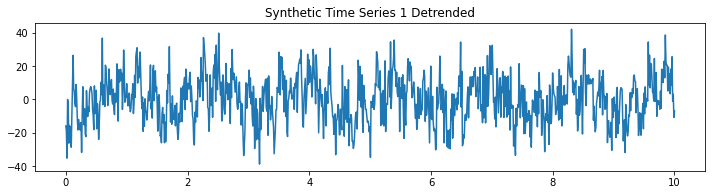

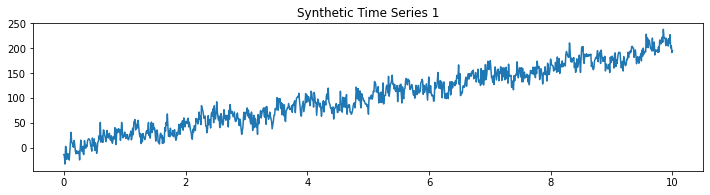

In [9]:
# Set seed for reproducibility
np.random.seed(42)

# Define parameters
n_points = 1000  # Number of data points
t = np.linspace(0, 10, n_points)  # Time vector

# Generate the first synthetic time series
series1_detrended = np.zeros(n_points)
num_sin = 5  # Number of sinusoids

for _ in range(num_sin):
    freq = np.random.uniform(0.1, 10)  # Frequency in Hz
    amplitude = np.random.uniform(1, 10)  # Amplitude
    phase = np.random.uniform(0, 2 * np.pi)  # Phase
    series1_detrended += amplitude * np.sin(2 * np.pi * freq * t + phase)

# Add random noise
noise_level = 10
noise = np.random.normal(0, noise_level, n_points)
series1_detrended += noise

# Add linear trend
slope = 20
intercept = 2
linear_trend = slope * t + intercept
series1 = series1_detrended + linear_trend




# Plot the synthetic time series
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.title('Synthetic Time Series 1 Detrended')
plt.plot(t, series1_detrended)
# Plot the synthetic time series
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 2)
plt.title('Synthetic Time Series 1')
plt.plot(t, series1)


In [10]:
# Defining the mean for each series
mean_series_1_detrended = np.mean(series1_detrended)

print('The mean for series1_detrended is: ', mean_series_1_detrended)
print('')
print('The mean for series1 is: ', mean_series_1)
print('')


# Defining the variance for each series
diff_mean1_series1_detrended = []
for i in series1_detrended: 
    diff_mean1_series1_detrended.append((i-mean_series_1_detrended)**2)

variance_series_1_detrended = 1/n_points * (np.sum(diff_mean1_series1_detrended))
print('The variance for series 1_detrended is: ', variance_series_1_detrended)
print('')
print('The variance for series 1 is: ', variance_series_1)
print('')

# Defining the quadratic norm and power for each series\
quad_norm_series_1_detrended = quadratic_norm(series1_detrended)
print('The quadratic norm for series 1_detrended is: {}'.format(quad_norm_series_1_detrended))
print('')
print('The quadratic norm for series 1 is: {}'.format(quad_norm_series_1))
print('')
power_series_1_detrended = power(series1_detrended)
print('The power for series 1_detrended is: {}'.format(power_series_1_detrended))
print('')
print('The power for series 1 is: {}'.format(power_series_1))
print('\n')
# Calculate Auto-Covariance and Auto-Correlation for Series 1 and Series 2
lag = 1

auto_cov_series1_detrended = autocovariance(series1_detrended, lag)
auto_corr_series1_detrended = auto_correlation(series1_detrended, lag)

# Print Auto-Covariance and Auto-Correlation for Series 1 and Series 2
print("Auto-Covariance for Series 1_detrended (Lag = 1):")
print(auto_cov_series1_detrended)

print("\nAuto-Correlation for Series 1_detrended (Lag = 1):")
print(auto_corr_series1_detrended)

print("\nAuto-Covariance for Series 1 (Lag = 1):")
print(auto_cov_series1)

print("\nAuto-Correlation for Series 1 (Lag = 1):")
print(auto_corr_series1)

# Calculate Cross-Covariance and Cross-Correlation for Series 1 and Series 2
cross_covariance_values_detrended = cross_covariance(series1_detrended, series1, lag)
cross_correlation_values_detrended = cross_correlation(series1_detrended, series1, lag)

# Print Cross-Covariance and Cross-Correlation
print("Cross-Covariance between Series 1_detrended and Series 1 (Lag = 1):")
print(cross_covariance_values_detrended)

print("\nCross-Correlation between Series 1_detrended and Series 1 (Lag = 1):")
print(cross_correlation_values_detrended)



The mean for series1_detrended is:  0.18146411146962027

The mean for series1 is:  102.18146411146962

The variance for series 1_detrended is:  195.30848601027014

The variance for series 1 is:  3552.660485873962

The quadratic norm for series 1_detrended is: 441.9744508837831

The quadratic norm for series 1 is: 3740.8170356003134

The power for series 1_detrended is: 195.3414152340216

The power for series 1 is: 13993.712093837516


Auto-Covariance for Series 1_detrended (Lag = 1):
93.64056602591496

Auto-Correlation for Series 1_detrended (Lag = 1):
0.4794495515212329

Auto-Covariance for Series 1 (Lag = 1):
3440.077754538502

Auto-Correlation for Series 1 (Lag = 1):
0.968310303846058
Cross-Covariance between Series 1_detrended and Series 1 (Lag = 1):
103.04049002635813

Cross-Correlation between Series 1_detrended and Series 1 (Lag = 1):
0.12370022963196486
